In [ ]:
# Autoreload packages in case they change.
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import btk
import btk.plot_utils
import ipywidgets as widgets
import matplotlib.patches as patches
import pandas as pd
import seaborn as sns
from IPython.display import clear_output, display

# Changing fonts to be latex typesetting
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif'
from btk import DEFAULT_SEED
seed = DEFAULT_SEED

# Sampling function with a `mag_cut=20`, `stamp_size=25.6`, `max_number=6`, `max_shift=5`

Changing the `plot_metrics_summary` code to allow for more descriptive titles of the different detection algorithms, as well as, taking out the upper title that is usually printed when `eff_mat` is selected in the interactive mode. 

In [ ]:
# class BrightDefaultSampling(btk.sampling_functions.SamplingFunction):
#     """Default sampling function used for producing blend tables with an explicit mag cut."""

#     def __init__(self, max_number=2, mag_cut=20, stamp_size=24.0, max_shift=None):
#         """
#         Args:
#             max_number (int): Defined in parent class
#             stamp_size (float): Size of the desired stamp.
#             max_shift (float): Magnitude of maximum value of shift. If None then it
#                              is set as one-tenth the stamp size. (in arcseconds)
#             mag_cut (float): The maximum magnitude that the samples can go to.
#         """
#         super().__init__(max_number)
#         self.stamp_size = stamp_size
#         self.max_shift = max_shift if max_shift else self.stamp_size / 10.0
#         self.mag_cut = mag_cut

#     @property
#     def compatible_catalogs(self):
#         return "CatsimCatalog", "CosmosCatalog"

#     def __call__(self, table):
#         """Applies default sampling to the input CatSim-like catalog and returns an
#         astropy table with entries corresponding to a blend centered close to postage
#         stamp center.

#         Function selects entries from input table that are brighter than 25.3 mag
#         in the i band. Number of objects per blend is set at a random integer
#         between 1 and Args.max_number. The blend table is then randomly sampled
#         entries from the table after selection cuts. The centers are randomly
#         distributed within 1/10th of the stamp size. Here even though the galaxies
#         are sampled from a CatSim catalog, their spatial location are not
#         representative of real blends.

#         Args:
#             table (astropy.table): Table containing entries corresponding to galaxies
#                                    from which to sample.

#         Returns:
#             Astropy.table with entries corresponding to one blend.
#         """
#         number_of_objects = np.random.randint(1, self.max_number + 1)
#         (q,) = np.where(table["ref_mag"] <= self.mag_cut)

#         blend_table = table[np.random.choice(q, size=number_of_objects)]
#         blend_table["ra"] = 0.0
#         blend_table["dec"] = 0.0
#         x_peak, y_peak = _get_random_center_shift(number_of_objects, self.max_shift)
#         blend_table["ra"] += x_peak
#         blend_table["dec"] += y_peak

#         if np.any(blend_table["ra"] > self.stamp_size / 2.0) or np.any(
#             blend_table["dec"] > self.stamp_size / 2.0
#         ):
#             warnings.warn("Object center lies outside the stamp")
#         return blend_table
    

# def _get_random_center_shift(num_objects, max_shift):
#     """Returns random shifts in x and y coordinates between + and - max-shift in arcseconds.

#     Args:
#         num_objects (int): Number of x and y shifts to return.

#     Returns:
#         x_peak (float): random shift along the x axis
#         y_peak (float): random shift along the x axis
#     """
#     x_peak = np.random.uniform(-max_shift, max_shift, size=num_objects)
#     y_peak = np.random.uniform(-max_shift, max_shift, size=num_objects)
#     return x_peak, y_peak

`max_shift` plays an important role in the efficiency matrix. `max_shift=5` gives poor results, but `max_shift=10` helps produce more sensible results.

In [ ]:
# # Define parameters
# stamp_size = 25.6 #Original: 24
# seed = 42
# max_number = 6
# max_shift = 5.0 # 10 had good results # Original: None

# # Import the galaxy catalog
# catalog_name = "/Users/matt/Desktop/UCI_Research/LSST/btk_blending/btk_tutorial/data/OneDegSq.fits"
# catalog = btk.catalog.CatsimCatalog.from_file(catalog_name)

# # Choose the sampling function
# # sampling_function = btk.sampling_functions.DefaultSampling(stamp_size=stamp_size,
# #                                                            max_number=max_number,
# #                                                            seed=seed)
# sampling_function = BrightDefaultSampling(stamp_size=stamp_size,
#                                           mag_cut=20,
#                                           max_number=max_number,
#                                           max_shift=max_shift)
# # Load teh survey parameters
# survey = btk.survey.get_surveys("LSST")

# # Instantiate the image generator
# draw_blend_generator = btk.draw_blends.CatsimGenerator(
#     catalog,
#     sampling_function,
#     [survey],
#     stamp_size=stamp_size,
#     batch_size=100, #,
#     augment_data=True,
#     seed=seed)

# meas_generator = btk.measure.MeasureGenerator([btk.measure.sep_singleband_measure,btk.measure.basic_measure],
#                                               draw_blend_generator)

# metrics_generator = btk.metrics.MetricsGenerator(meas_generator,
#                                                  target_meas={"ellipticity":btk.metrics.meas_ksb_ellipticity}, #See custom-tutorial for more details
#                                                  meas_band_name="r")
# blend_results, meas_results,results = next(metrics_generator)


In [ ]:
# batch = next(draw_blend_generator)
# blend_images = batch['blend_images']
# blend_list = batch['blend_list']
# btk.plot_utils.plot_blends(blend_images[:5], blend_list[:5], norm="asinh", Q=0.1)

In [ ]:
# btk.plot_utils.plot_metrics_summary(results,
#                                     interactive=True,
#                                     target_meas_keys=['ellipticity0'],
#                                     target_meas_limits=[(-1, 1)],
#                                     aliases = {'sep_singleband_measure': "SEP single band",
#                                                'basic_measure': "Basic Peak Finding Algorithm"},
#                                     save_path='/Users/matt/Downloads')

# Sampling function with a `mag_cut=20`, `stamp_size=25.6`, `max_number=2`, `max_shift=5`. This is the toy example with two galaxies always separated by the same distance with a `mag_cut=20`.

In [ ]:
# class PairSampling(btk.sampling_functions.SamplingFunction):
#     """
#     Sampling function that generates two galaxies where one is centered 
#     and the other one is shifted. Every generated sample will have the 
#     shifted galaxy the same distance away from the centered galaxy.
#     """
    
#     def __init__(self, stamp_size=24.0, max_shift=None, mag_cut=20):
#         super().__init__(2)
#         self.stamp_size = stamp_size
#         self.max_shift = max_shift if max_shift else self.stamp_size / 10.0
#         self.mag_cut = mag_cut

#     @property
#     def compatible_catalogs(self):
#         return "CatsimCatalog", "CosmosCatalog"

#     def __call__(self,table):
#         (q_bright,) = np.where(table["ref_mag"] <= self.mag_cut)
        
#         indexes = [np.random.choice(q_bright),np.random.choice(q_bright)]
#         blend_table = table[indexes]
        
#         blend_table["ra"] = 0.0
#         blend_table["dec"] = 0.0
        
#         x_peak, y_peak = _get_set_center_shift(self.max_shift)
        
#         blend_table["ra"][1] += x_peak
#         blend_table["dec"][1] += y_peak

#         if np.any(blend_table["ra"] > self.stamp_size / 2.0) or np.any(
#             blend_table["dec"] > self.stamp_size / 2.0
#         ):
#             warnings.warn("Object center lies outside the stamp")
#         return blend_table


# def _get_set_center_shift(max_shift):
#     """
#     Returns the shift for the off-centered galaxy. Every sample will
#     have the same distance between the centered galaxy and shifted galaxy.
#     The function returns the shifts in x and y coordinates at +/- max-shift 
#     in arcseconds.
    
#     Args:
#         max_shift (int): Size of the max_shift

#     Returns:
#         x_peak (float): shift along the x axis
#         y_peak (float): shift along the x axis
#     """
#     dist = np.asarray([-max_shift, max_shift])
#     x_indices = np.random.choice(len(dist), size=1, p=None)
#     y_indices = np.random.choice(len(dist), size=1, p=None)
#     x_peak = dist[x_indices]
#     y_peak = dist[y_indices]
#     return x_peak, y_peak

In [ ]:
# # Define parameters
# stamp_size = 25.6 #Original: 24
# seed = 42
# max_number = 2
# max_shift = 5.0 # 10 had good results # Original: None

# # Import the galaxy catalog
# catalog_name = "/Users/matt/Desktop/UCI_Research/LSST/btk_blending/btk_tutorial/data/OneDegSq.fits"
# catalog = btk.catalog.CatsimCatalog.from_file(catalog_name)

# # Choose the sampling function
# sampling_function = PairSampling(stamp_size=stamp_size,
#                                  mag_cut=20,
#                                  max_shift=max_shift)
# # Load teh survey parameters
# survey = btk.survey.get_surveys("LSST")

# # Instantiate the image generator
# draw_blend_generator = btk.draw_blends.CatsimGenerator(
#     catalog,
#     sampling_function,
#     [survey],
#     stamp_size=stamp_size,
#     batch_size=1000, #,
#     augment_data=True,
#     seed=seed)

# meas_generator = btk.measure.MeasureGenerator([btk.measure.sep_singleband_measure,btk.measure.basic_measure],
#                                               draw_blend_generator)

# metrics_generator = btk.metrics.MetricsGenerator(meas_generator,
#                                                  target_meas={"ellipticity":btk.metrics.meas_ksb_ellipticity}, #See custom-tutorial for more details
#                                                  meas_band_name="r")
# blend_results, meas_results,results_pair = next(metrics_generator)

In [ ]:
# batch = next(draw_blend_generator)
# blend_images = batch['blend_images']
# blend_list = batch['blend_list']
# btk.plot_utils.plot_blends(blend_images[:5], blend_list[:5],norm="asinh", Q=0.1)

In [ ]:
# btk.plot_utils.plot_metrics_summary(results_pair,
#                                     interactive=True,
#                                     target_meas_keys=['ellipticity0'],
#                                     target_meas_limits=[(-1, 1)],
#                                     aliases = {'sep_singleband_measure': "SEP single band",
#                                                'basic_measure': "Basic Peak Finding Algorithm"},
#                                     save_path='/Users/matt/Downloads')

# Testing why there's a separate red component

In [ ]:
class PairSampling(btk.sampling_functions.SamplingFunction):
    """
    Sampling function that generates two galaxies where one is centered 
    and the other one is shifted. Every generated sample will have the 
    shifted galaxy the same distance away from the centered galaxy.
    """
    
    def __init__(self, max_number=2, stamp_size=24.0, max_shift=None, mag_cut=20):
        super().__init__(max_number)
        self.stamp_size = stamp_size
        self.max_shift = max_shift if max_shift else self.stamp_size / 10.0
        self.mag_cut = mag_cut

    @property
    def compatible_catalogs(self):
        return "CatsimCatalog", "CosmosCatalog"

    def __call__(self,table):
        number_of_objects = self.max_number
        (q_bright,) = np.where(table["ref_mag"] <= self.mag_cut)
        
        blend_table = table[np.random.choice(q_bright, size=number_of_objects)]
        
        blend_table["ra"] = 0.0
        blend_table["dec"] = 0.0
        
        x_peak, y_peak = _get_set_center_shift(self.max_shift)
        
        blend_table["ra"][1] += x_peak
        blend_table["dec"][1] += y_peak

        if np.any(blend_table["ra"] > self.stamp_size / 2.0) or np.any(
            blend_table["dec"] > self.stamp_size / 2.0
        ):
            warnings.warn("Object center lies outside the stamp")
        return blend_table


def _get_set_center_shift(max_shift):
    """
    Returns the shift for the off-centered galaxy. Every sample will
    have the same distance between the centered galaxy and shifted galaxy.
    The function returns the shifts in x and y coordinates at +/- max-shift 
    in arcseconds.
    
    Args:
        max_shift (int): Size of the max_shift

    Returns:
        x_peak (float): shift along the x axis
        y_peak (float): shift along the x axis
    """
    dist = np.asarray([-max_shift, max_shift])
    x_indices = np.random.choice(len(dist), size=1, p=None)
    y_indices = np.random.choice(len(dist), size=1, p=None)
    x_peak = dist[x_indices]
    y_peak = dist[y_indices]
    return x_peak, y_peak

Plotting examples when the peak finding fails

In [ ]:
# Define parameters
stamp_size = 24 #Original: 24
max_number = 2
max_shift = 5.0 # 10 had good results # Original: None

# Import the galaxy catalog
catalog_name = "/Users/matt/Desktop/UCI_Research/LSST/btk_blending/btk_tutorial/data/OneDegSq.fits"
catalog = btk.catalog.CatsimCatalog.from_file(catalog_name)

# Choose the sampling function
sampling_function = PairSampling(stamp_size=stamp_size,
                                 mag_cut=20,
                                 max_shift=max_shift)
# Load the survey parameters
survey = btk.survey.get_surveys("LSST")

# Instantiate the image generator
draw_blend_generator = btk.draw_blends.CatsimGenerator(
    catalog,
    sampling_function,
    [survey],
    stamp_size=stamp_size,
    batch_size=20, # Only use 20, because the efficiency matrix says 
    augment_data=True,
    seed=seed)

# meas_generator = btk.measure.MeasureGenerator([btk.measure.sep_singleband_measure,btk.measure.basic_measure],
#                                               draw_blend_generator)

# Only use the basic peak finding algorithm
meas_generator = btk.measure.MeasureGenerator([btk.measure.basic_measure],
                                              draw_blend_generator)

metrics_generator = btk.metrics.MetricsGenerator(meas_generator,
                                                 target_meas={"ellipticity":btk.metrics.meas_ksb_ellipticity}, #See custom-tutorial for more details
                                                 meas_band_name="r")

blend_results_pair, meas_results,results_pair = next(metrics_generator)

Generating blends for LSST survey:   0%|          | 0/20 [00:00<?, ?it/s]

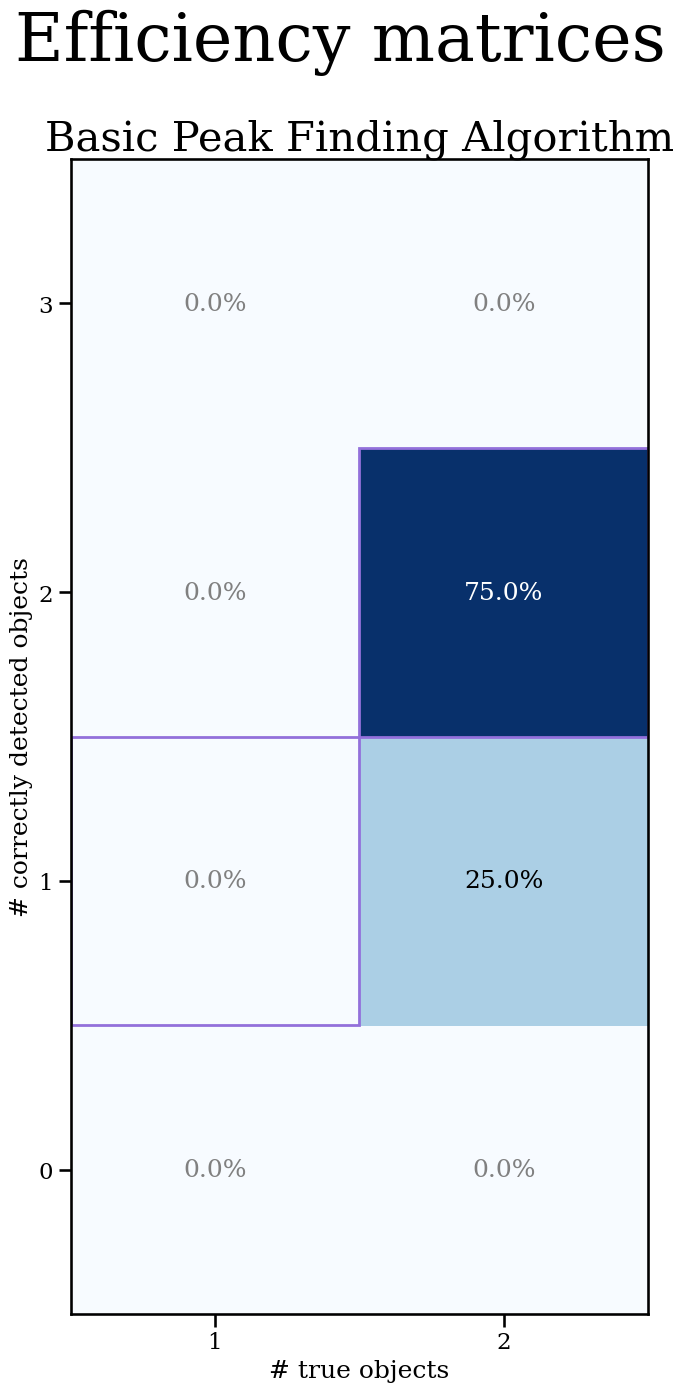

In [ ]:
# Plotting the efficiency of the basic peak finding algorithm
btk.plot_utils.plot_metrics_summary(results_pair,
                                    interactive=True,
                                    target_meas_keys=['ellipticity0'],
                                    target_meas_limits=[(-1, 1)],
                                    aliases = {'sep_singleband_measure': "SEP single band",
                                               'basic_measure': "Basic Peak Finding Algorithm"},
                                    save_path='/Users/matt/Downloads')

In [ ]:
len(meas_results["deblended_images"]["basic_measure"])

20

In [ ]:
len(results_pair["matches"]["basic_measure"])

20

TypeError: 'NoneType' object is not subscriptable

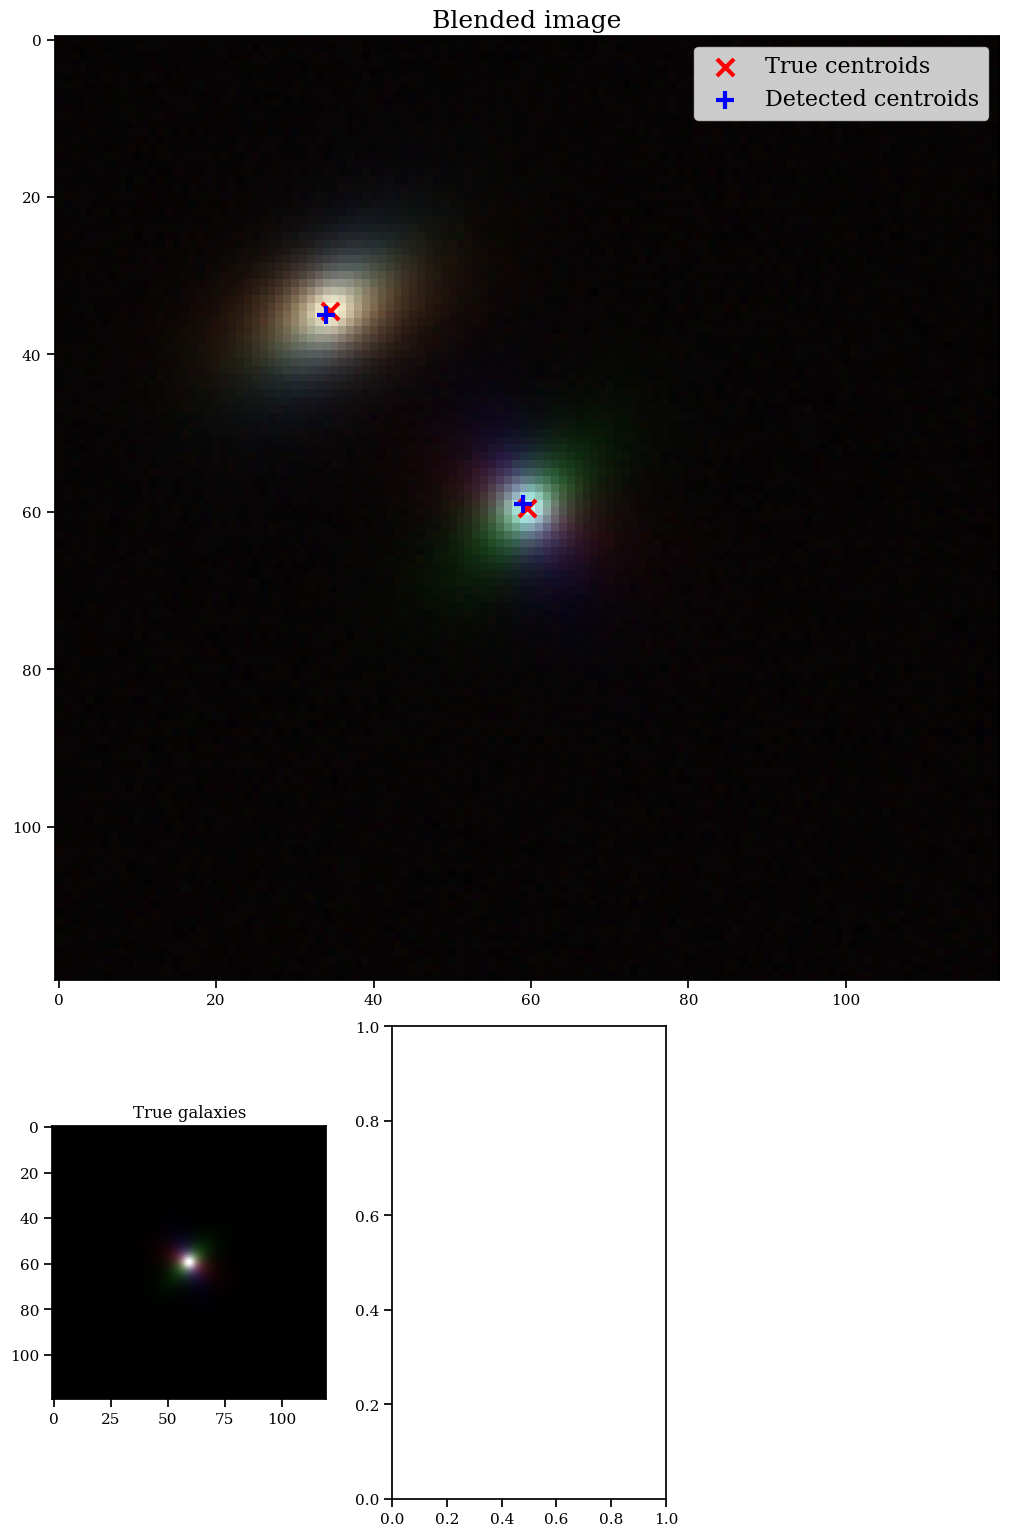

In [ ]:
btk.plot_utils.plot_with_deblended(
    blend_results_pair["blend_images"],
    blend_results_pair["isolated_images"],
    blend_results_pair["blend_list"],
    meas_results["catalog"]["basic_measure"],
    meas_results["deblended_images"]["basic_measure"],
    results_pair["matches"]["basic_measure"],
    indexes=[0],
    band_indices=[1, 2, 3]
)

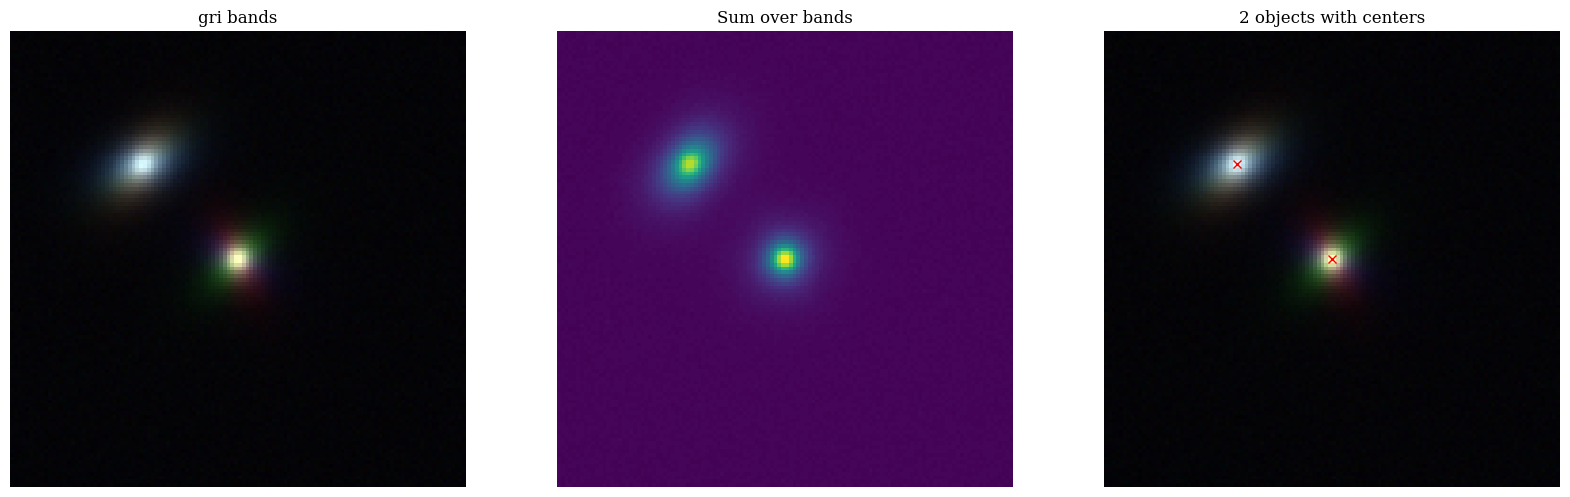

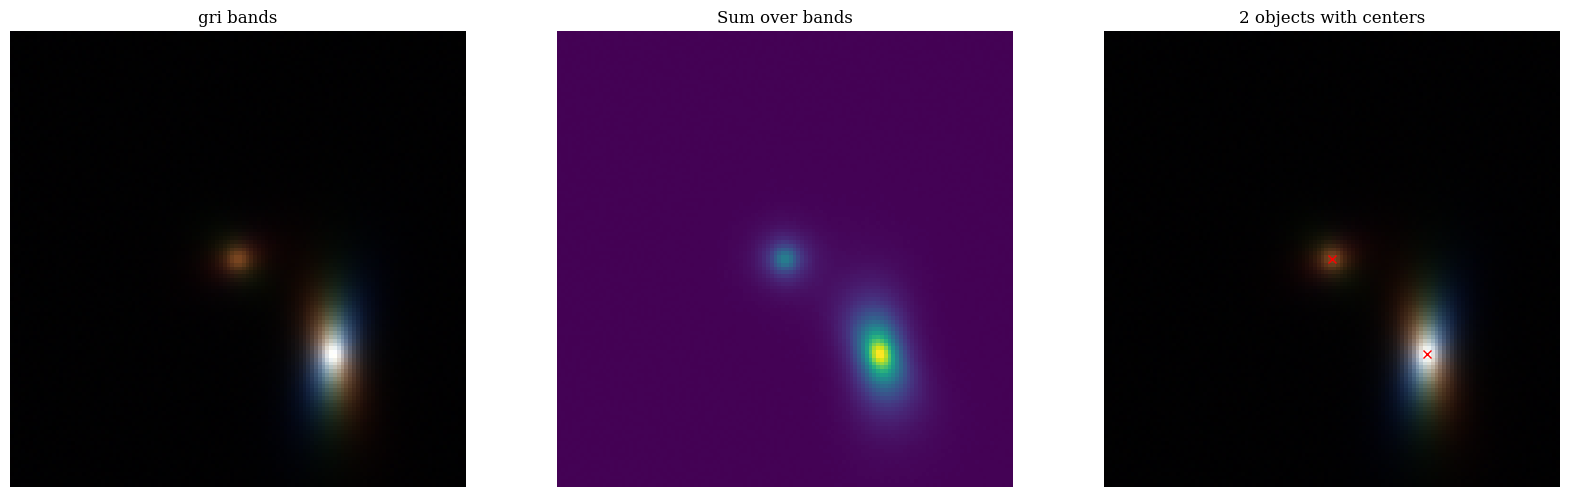

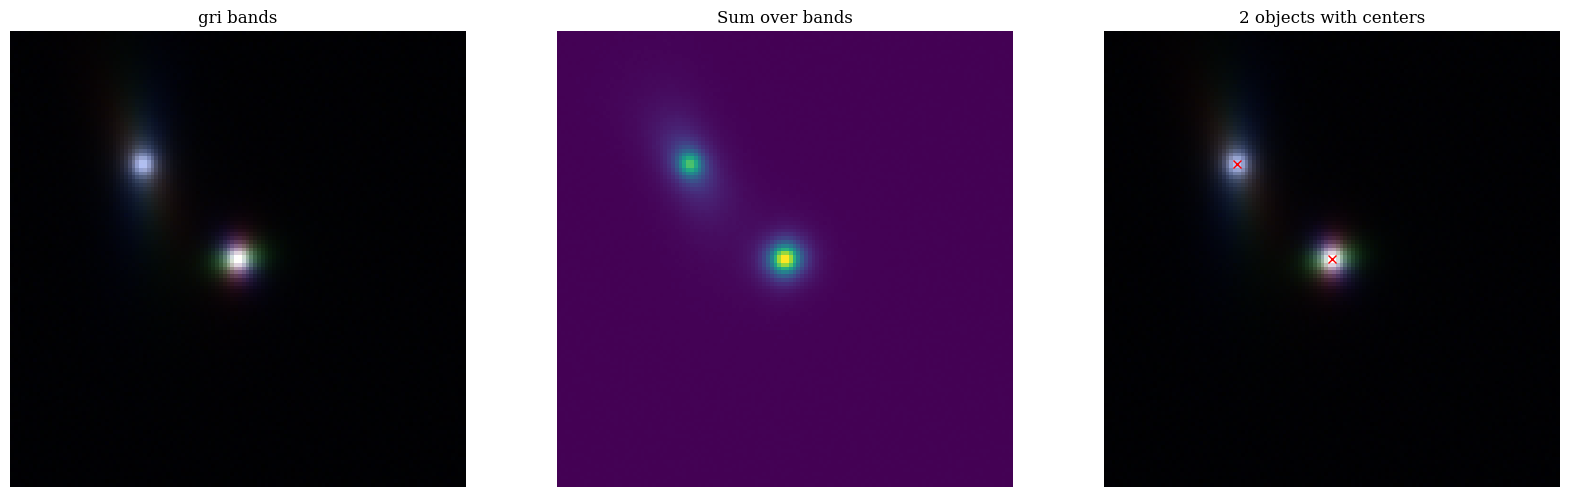

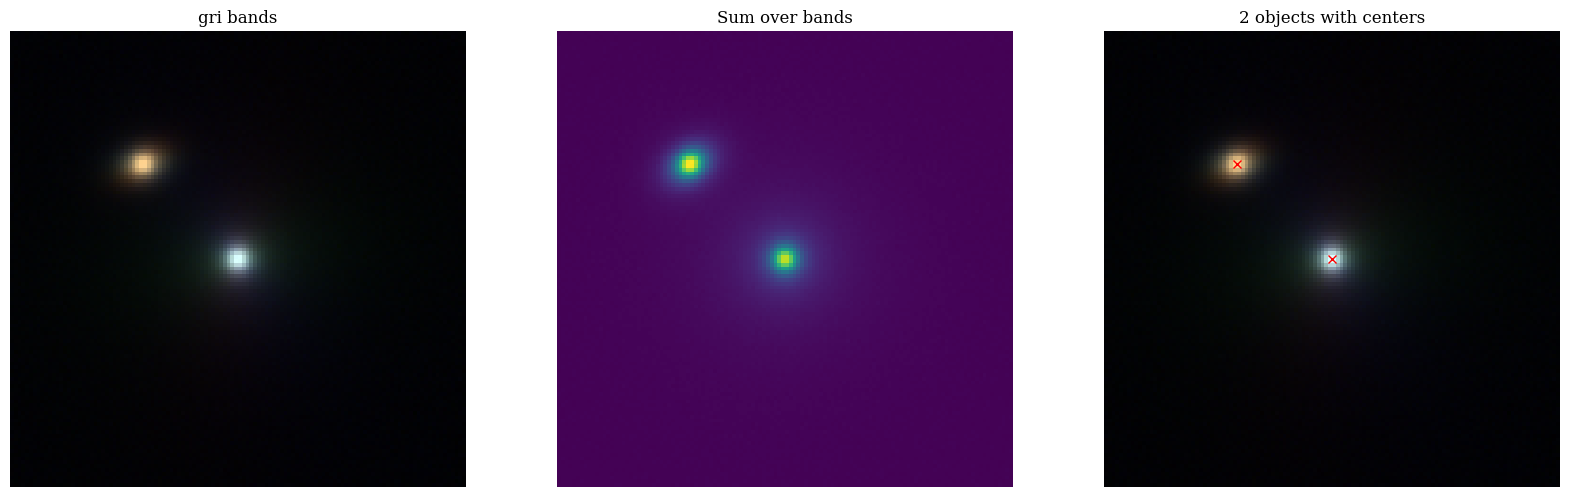

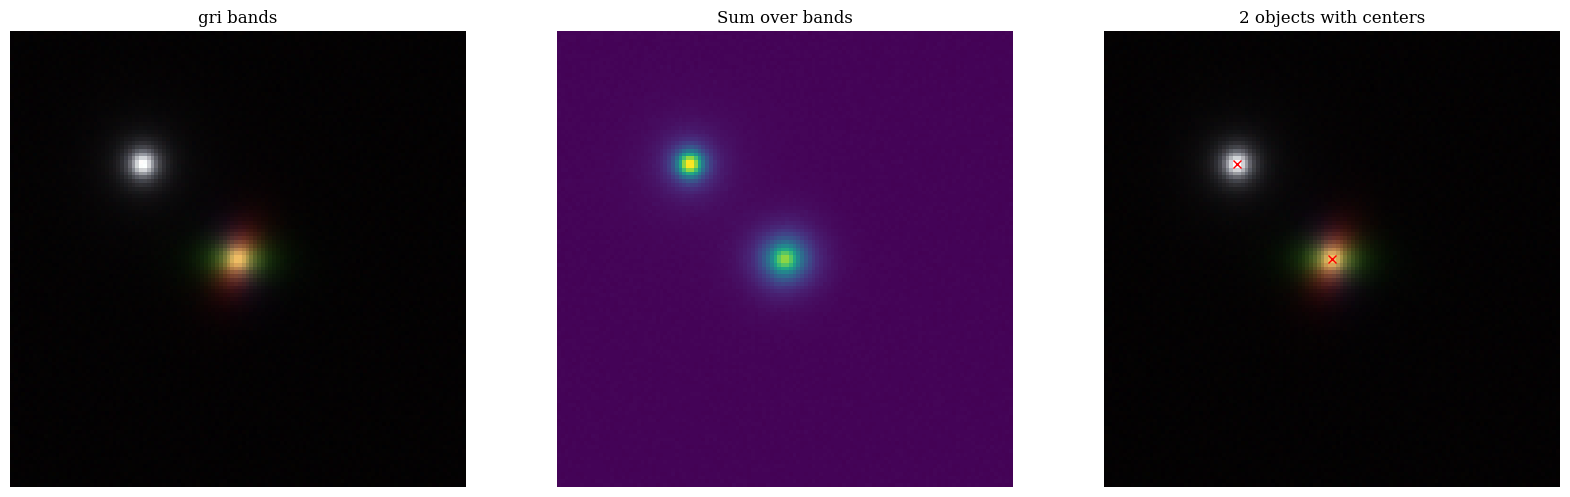

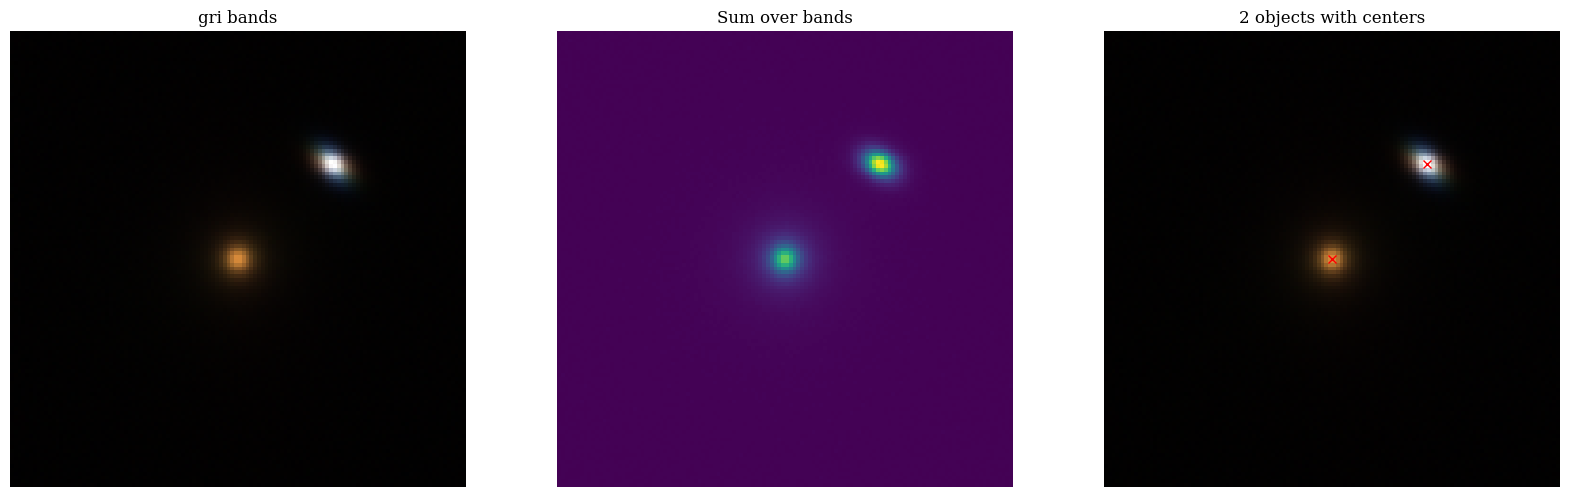

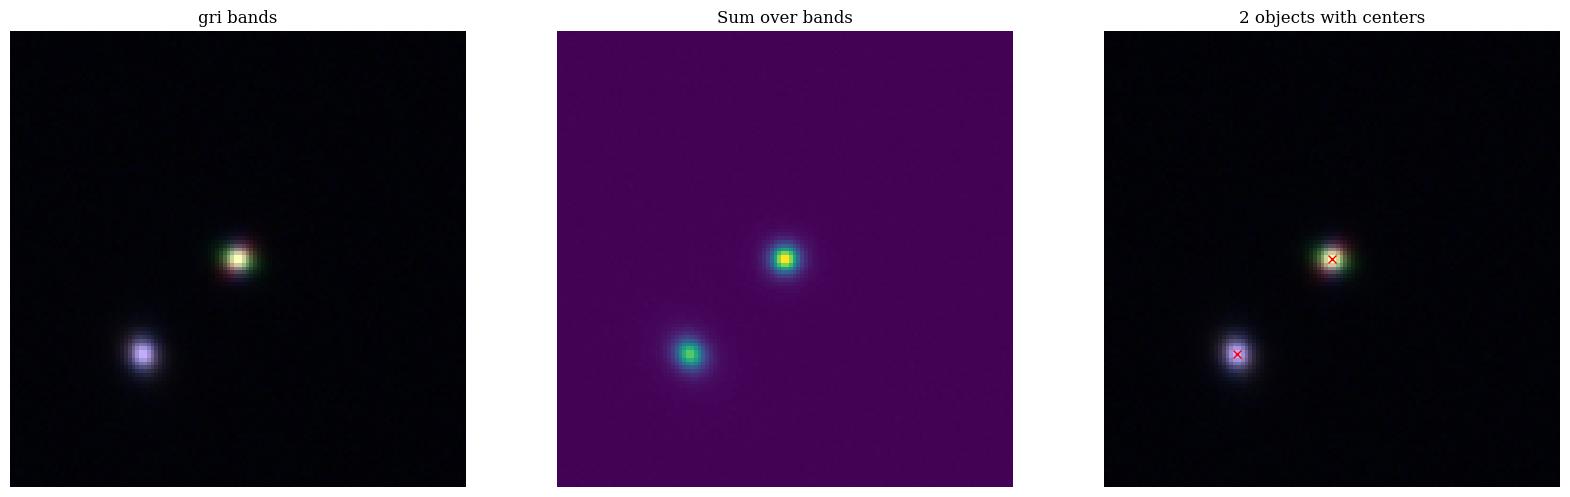

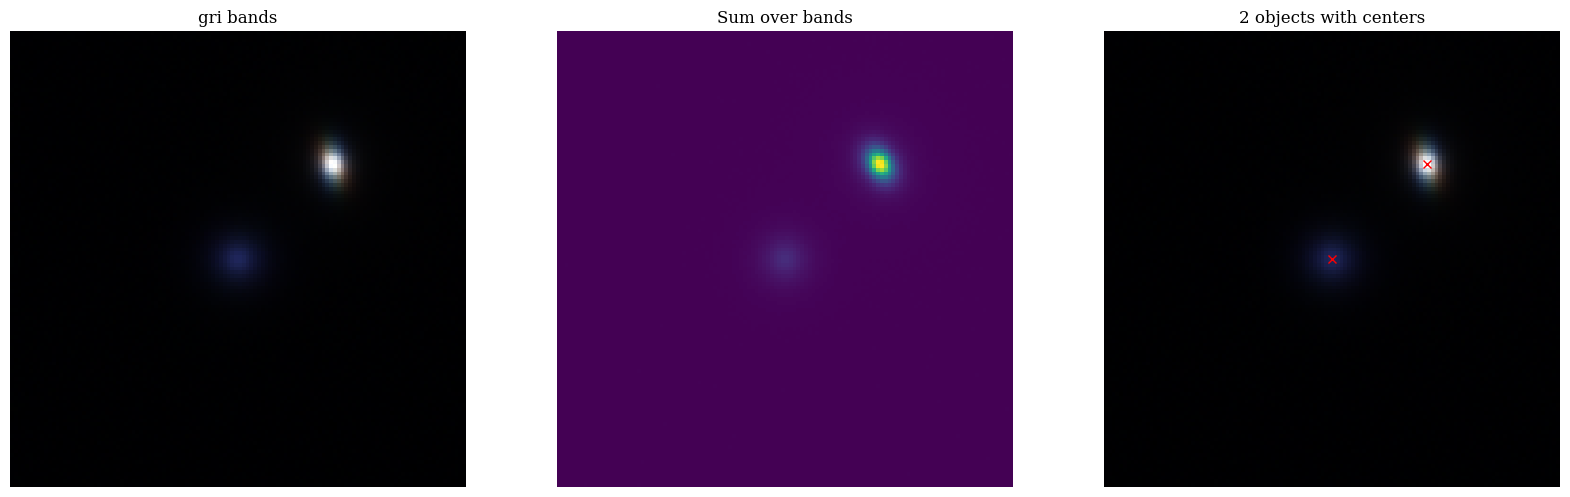

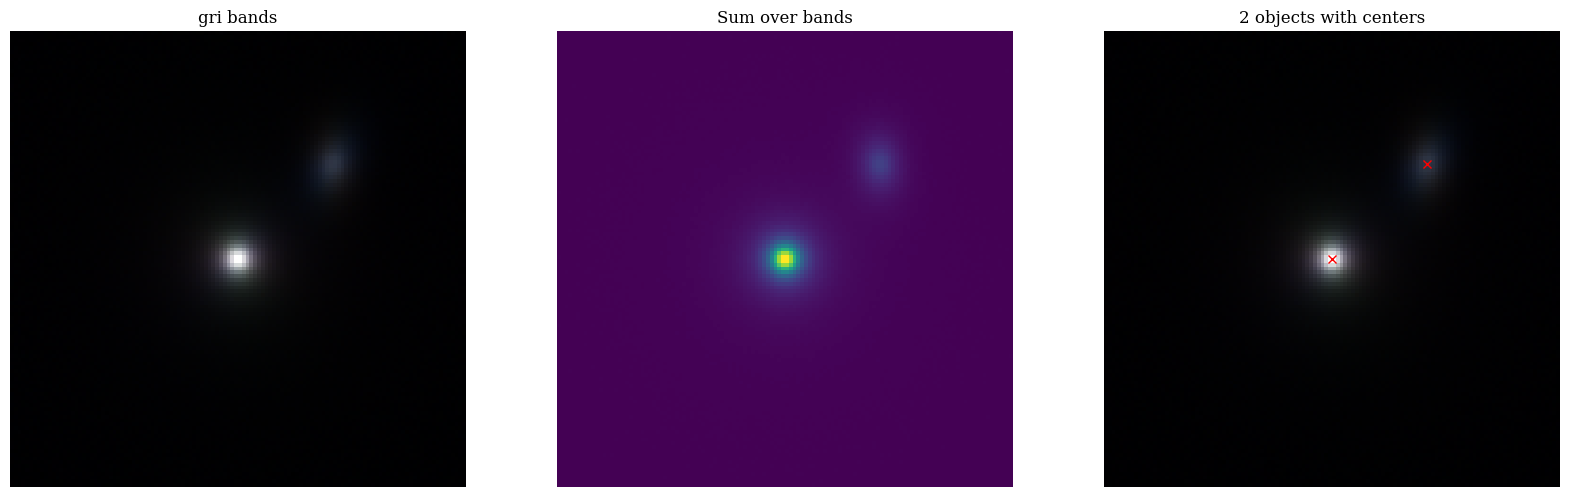

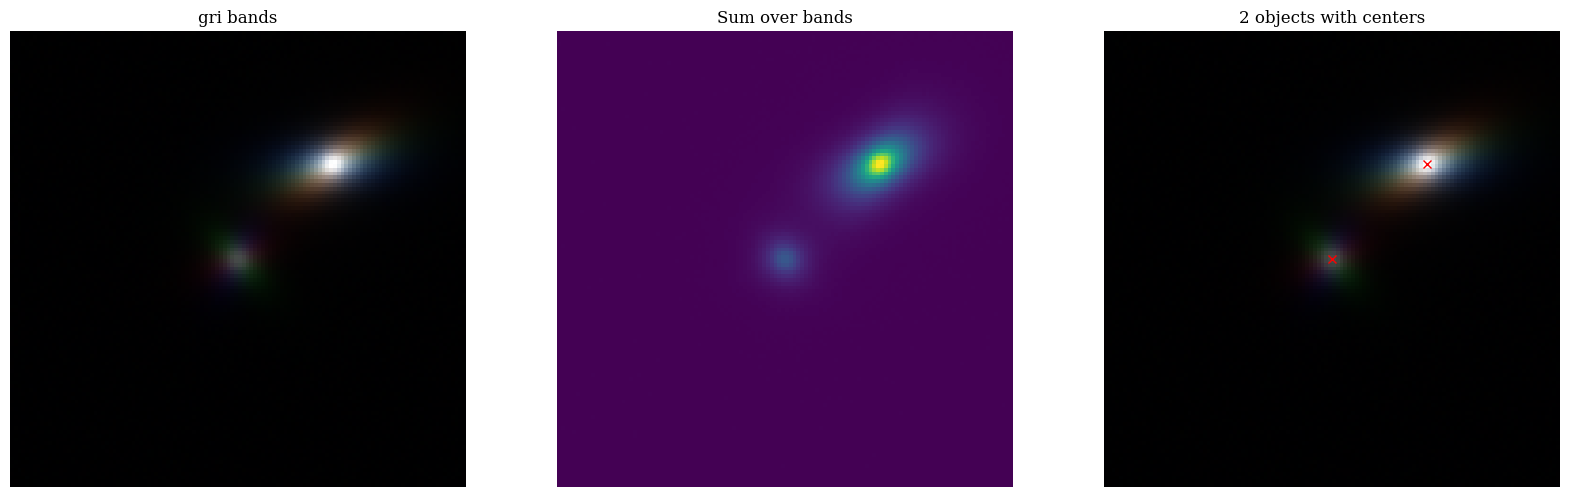

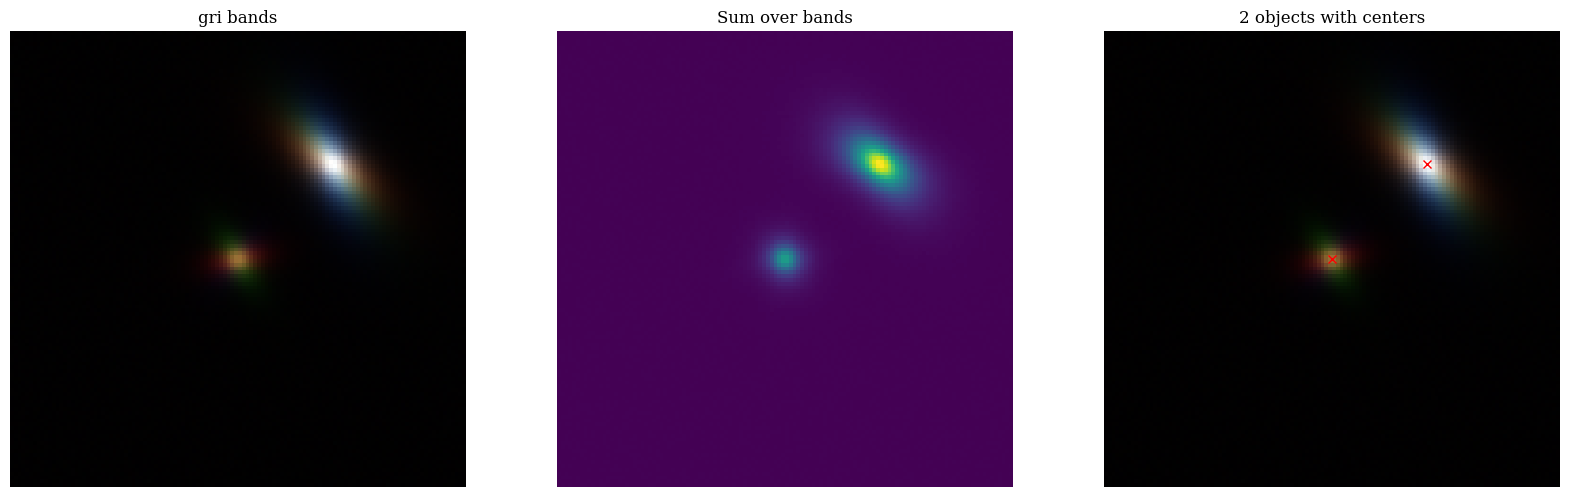

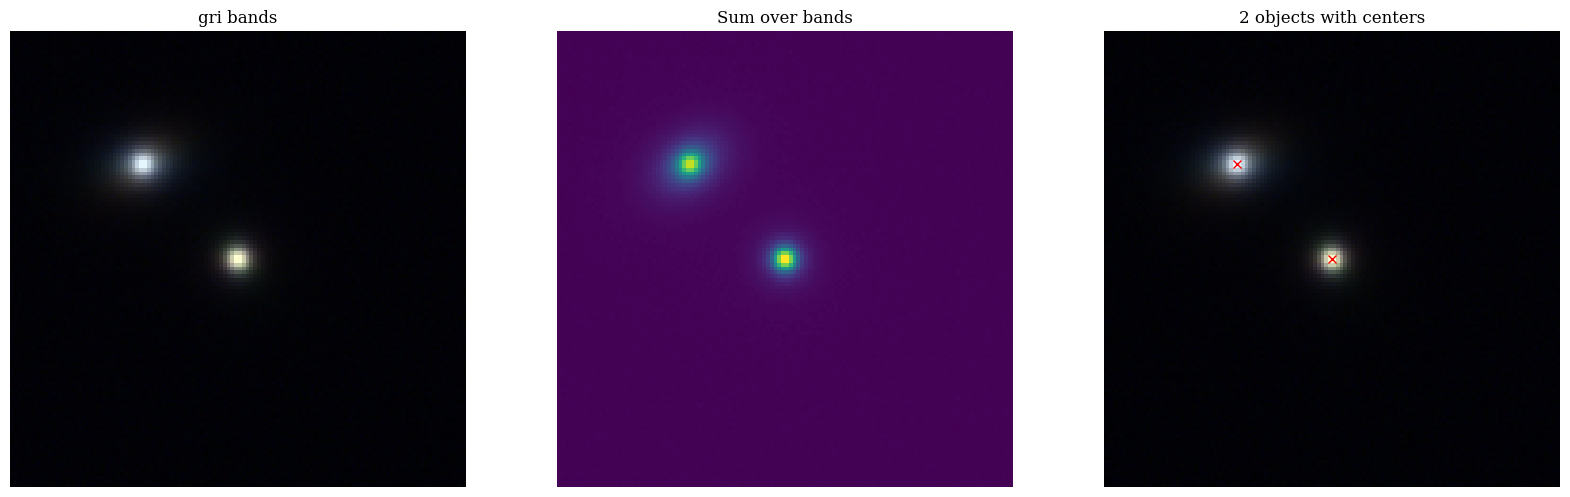

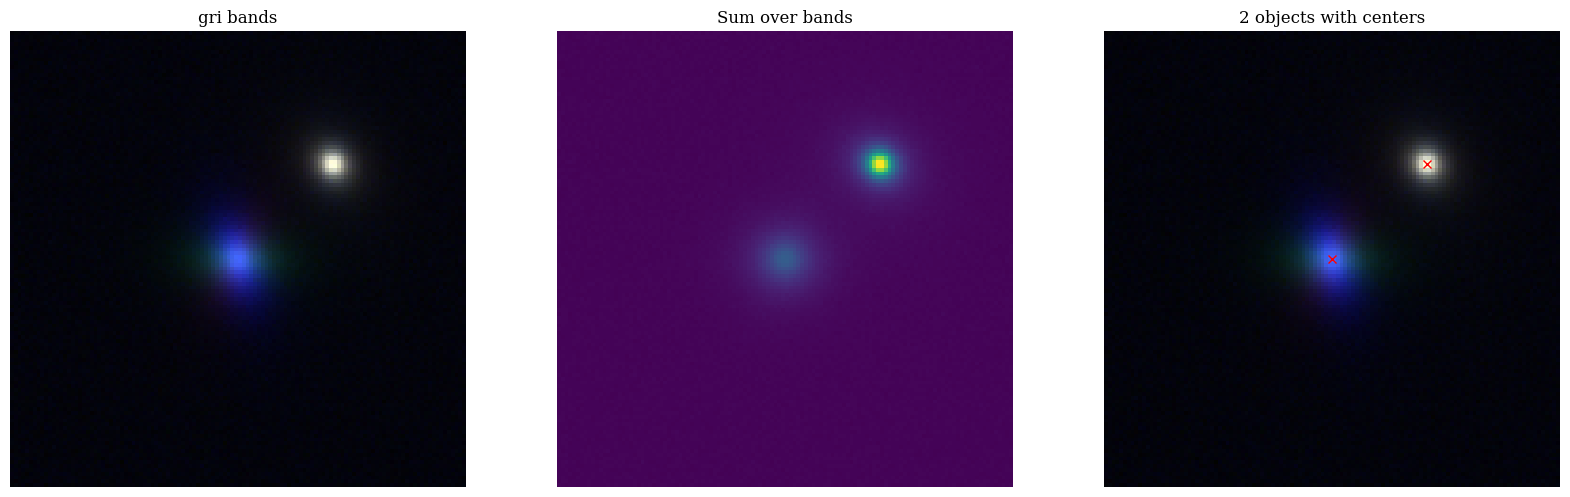

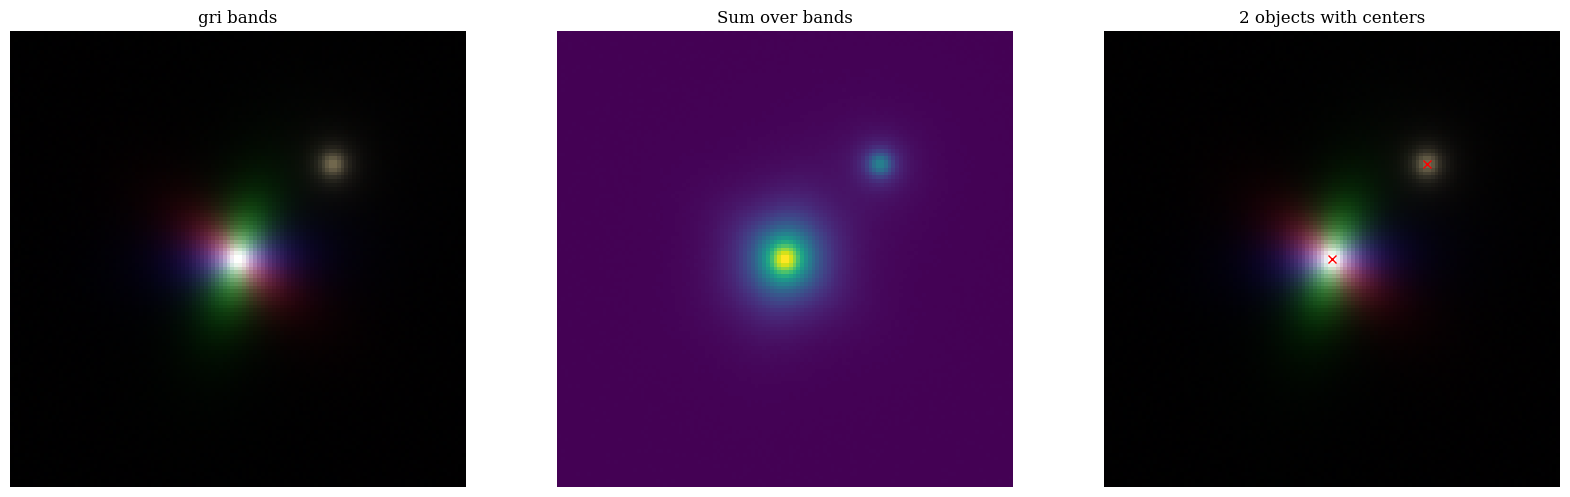

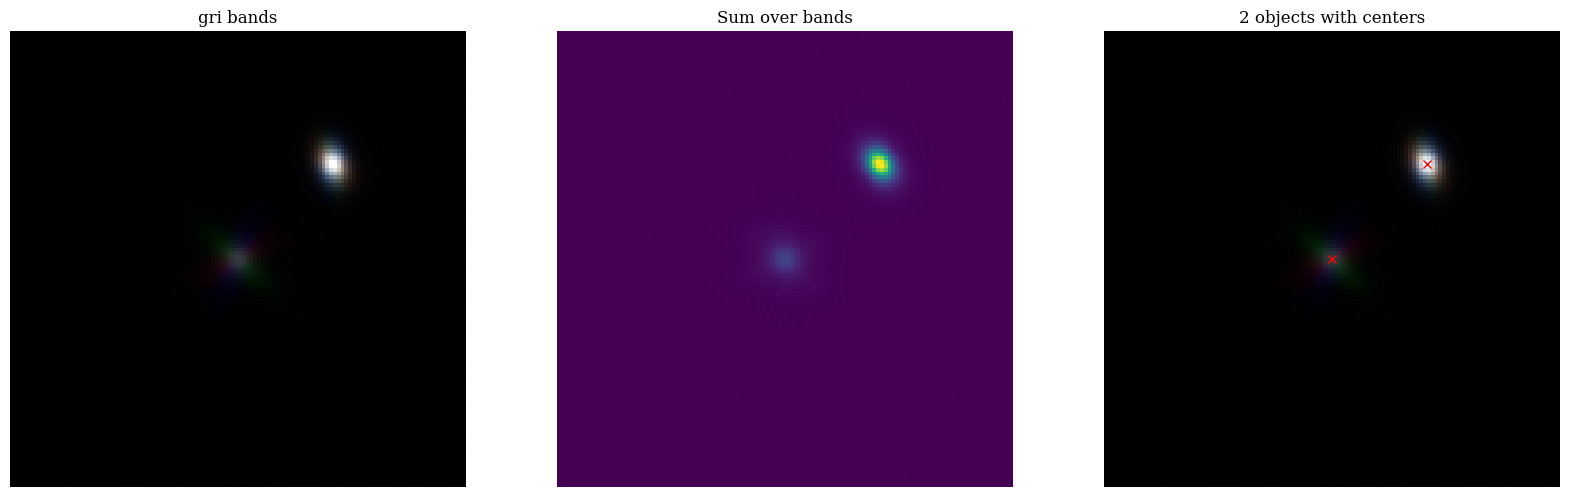

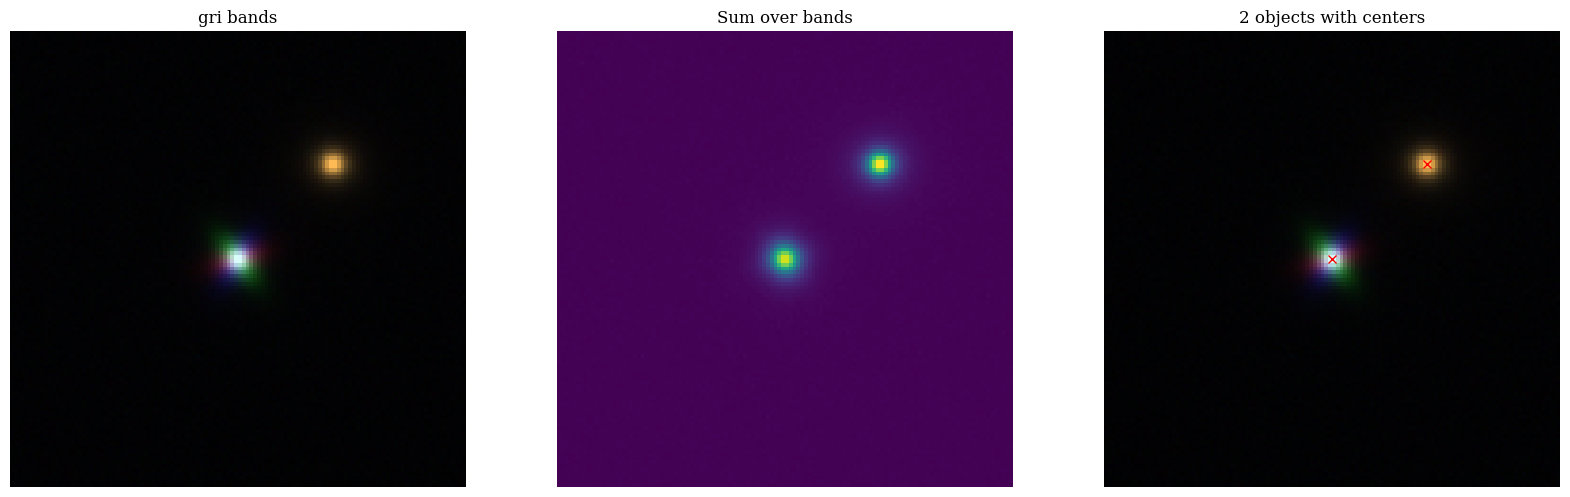

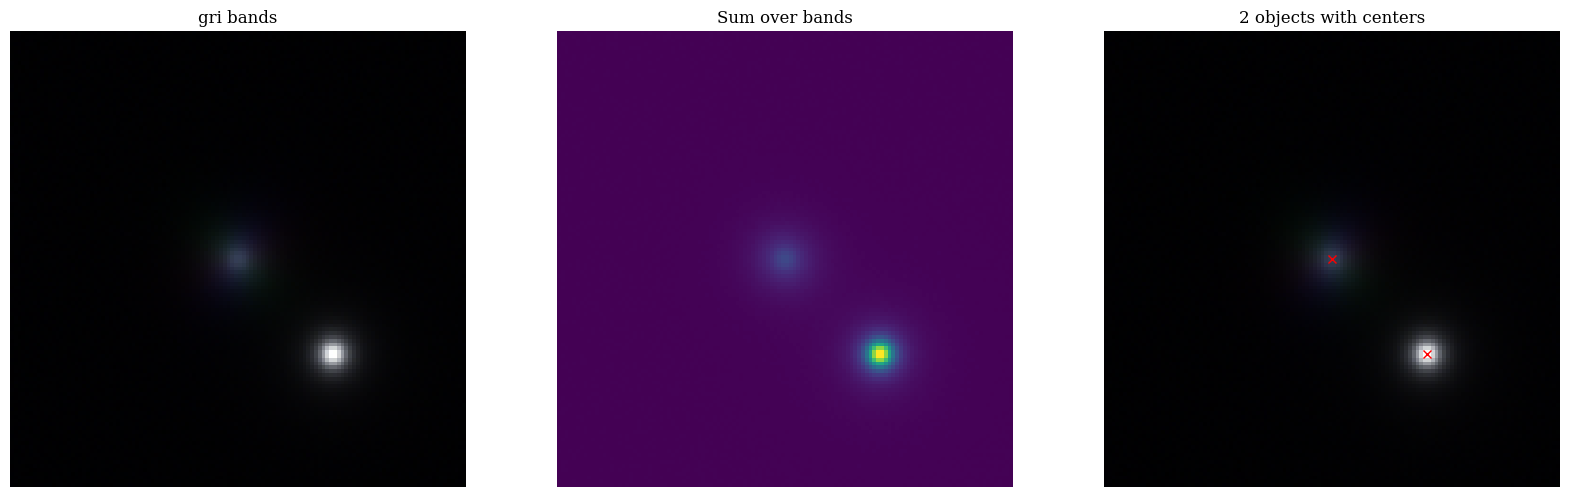

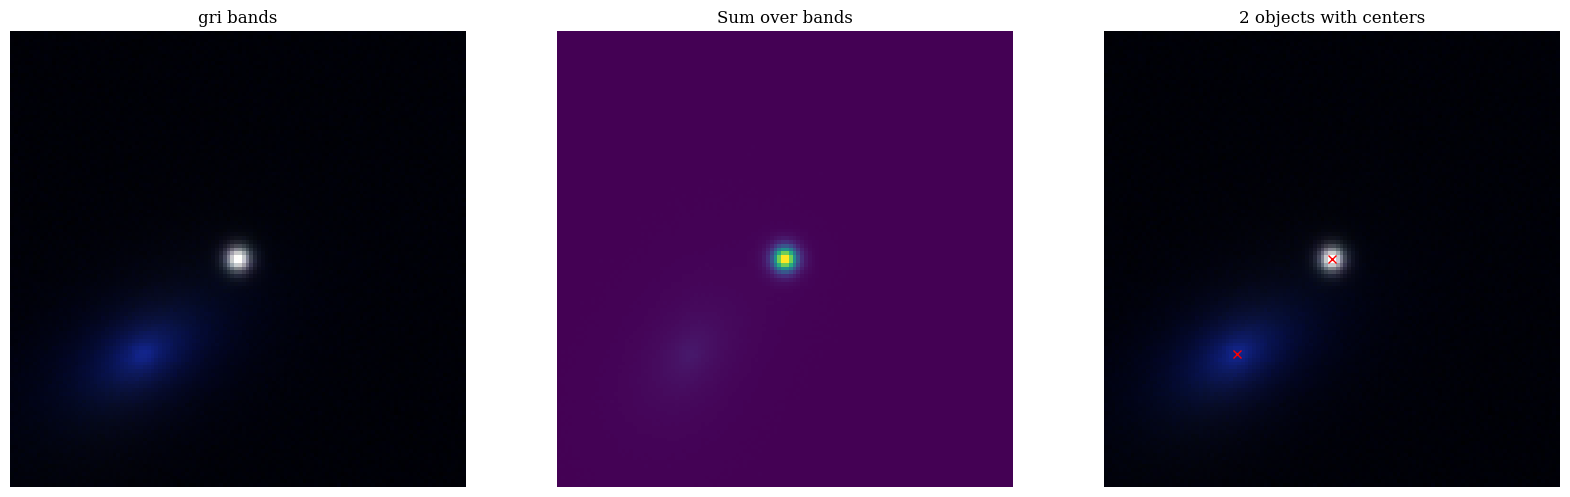

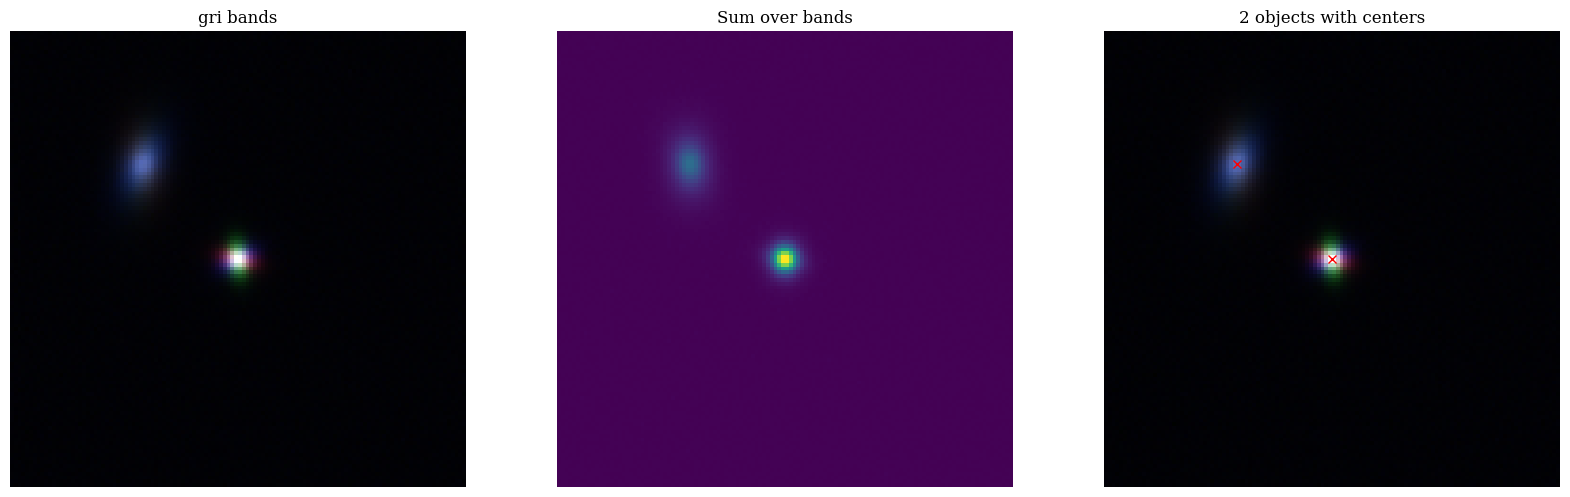

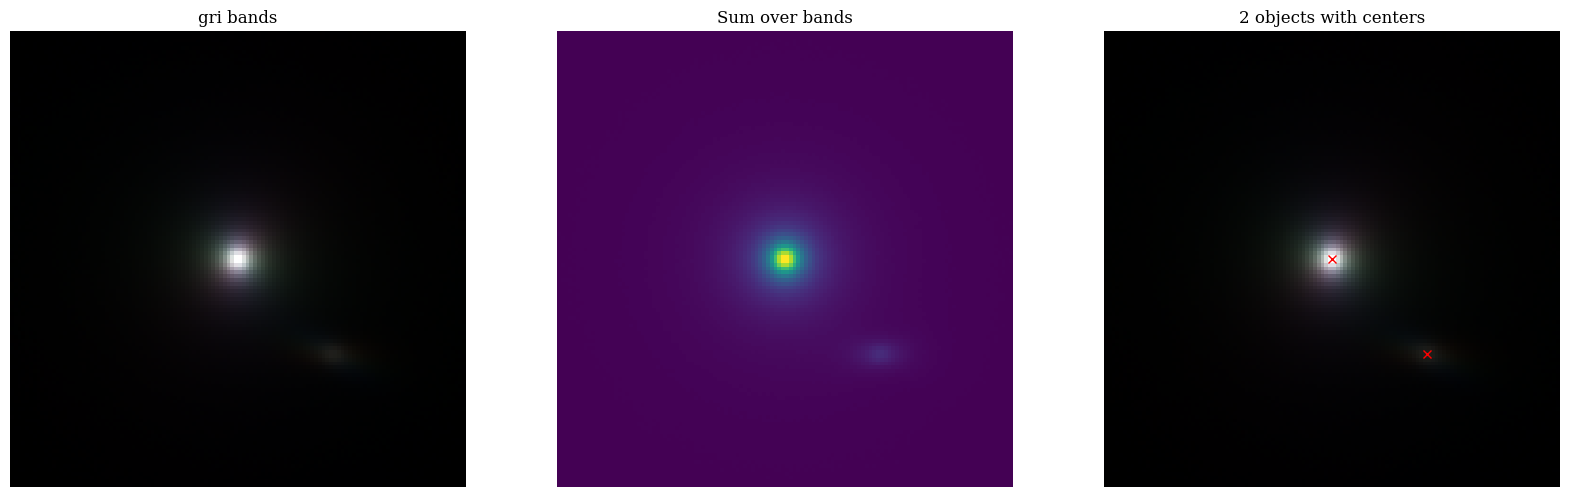

In [ ]:
# Create an example for when the basic peak finding fails
btk.plot_utils.plot_blends(blend_results_pair['blend_images'][:],
                           blend_results_pair['blend_list'][:])